1. Importing libraries and data and renaming columns
2. Standadizing the data
3. Elbow technique
4. k-means clustering

In [ ]:
# 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\RUD\Desktop\A6_Boat_Sales'

In [4]:
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'df_boat_map.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price in EUR,Visibility,Web_traffic
0,0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75,3490,Low Visibility,204589
1,1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58,3399,Low Visibility,204589
2,2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239,3535,Middle Visibility,316879
3,3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy,69,3500,Low Visibility,124949
4,4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland,113,4646,Middle Visibility,316879


In [6]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [7]:
df.rename(columns = {'Number of views last 7 days':'views_7days'}, inplace = True)

In [10]:
df = df[['Length','Width','views_7days','Price in EUR']]

In [11]:
df

,Length,Width,views_7days,Price in EUR
0,4.00,1.50,75,3490
1,3.55,1.46,58,3399
2,4.35,1.75,239,3535
3,4.70,2.00,69,3500
4,4.40,1.65,113,4646
...,...,...,...,...
6602,7.20,2.70,1299,5050
6603,6.00,2.10,1917,5048
6604,6.00,1.62,288,4999
6605,4.40,1.80,354,4499


In [12]:
# 2. Standadizing the data

In [13]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.39633812 -1.76304072 -0.5095578  -0.36771815]
 [-1.48326471 -1.79872866 -0.60911375 -0.36784038]
 [-1.32872855 -1.53999109  0.4508643  -0.36765771]
 ...
 [-1.00999772 -1.6559769   0.73781968 -0.36569127]
 [-1.31907004 -1.49538116  1.12433101 -0.36636287]
 [-1.4736062  -1.67382087  0.18733384 -0.36727893]]


In [14]:
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

        Length     Width  views_7days  Price in EUR
0    -1.396338 -1.763041    -0.509558     -0.367718
1    -1.483265 -1.798729    -0.609114     -0.367840
2    -1.328729 -1.539991     0.450864     -0.367658
3    -1.261119 -1.316941    -0.544695     -0.367705
4    -1.319070 -1.629211    -0.287021     -0.366165
...        ...       ...          ...           ...
6602 -0.778193 -0.692402     6.658471     -0.365623
6603 -1.009998 -1.227722    10.277622     -0.365625
6604 -1.009998 -1.655977     0.737820     -0.365691
6605 -1.319070 -1.495381     1.124331     -0.366363
6606 -1.473606 -1.673821     0.187334     -0.367279

[6607 rows x 4 columns]


In [15]:
# 3. Elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [18]:
score

[-26427.999999999993,
 -17102.663325914757,
 -13863.439841039573,
 -10421.826313748614,
 -7393.068659333889,
 -6543.651749296921,
 -5715.478323488617,
 -4961.946999446034,
 -4366.940234844843]

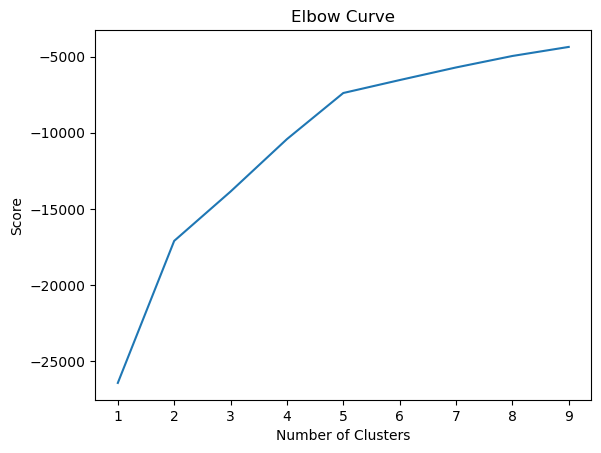

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [20]:
# The is a noticable straighten line on the x-axis after 5. Therefore, the optimal count for clusters is five.

In [22]:
# 4. k-means clustering

In [24]:
# Create k-means obj
kmeans = KMeans(n_clusters = 5)

In [25]:
# Fit the k-means object to data
kmeans.fit(df)

KMeans(n_clusters=5)

In [26]:
df['clusters'] = kmeans.fit_predict(df)

In [27]:
df.head()

,Length,Width,views_7days,Price in EUR,clusters
0,-1.396338,-1.763041,-0.509558,-0.367718,1
1,-1.483265,-1.798729,-0.609114,-0.367840,1
2,-1.328729,-1.539991,0.450864,-0.367658,1
3,-1.261119,-1.316941,-0.544695,-0.367705,1
4,-1.319070,-1.629211,-0.287021,-0.366165,1


In [28]:
df['clusters'].value_counts()

clusters
1    3210
0    2440
2     610
4     300
3      47
Name: count, dtype: int64

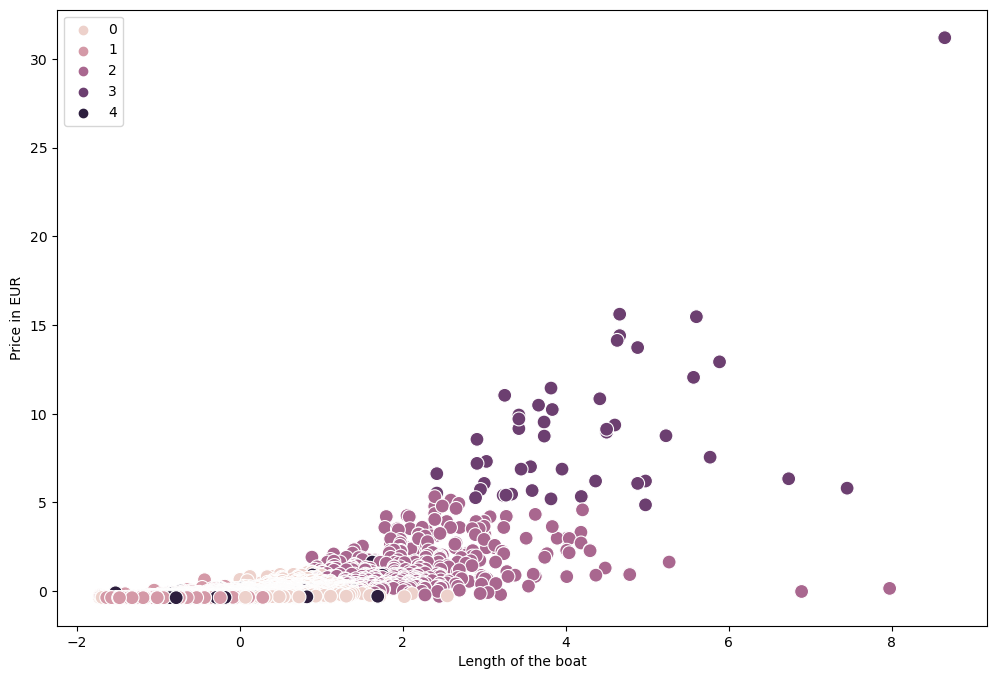

In [34]:
# Plot the clusters for the "EUR_price" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['Price in EUR'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('Price in EUR') # Label y-axis.
plt.show()

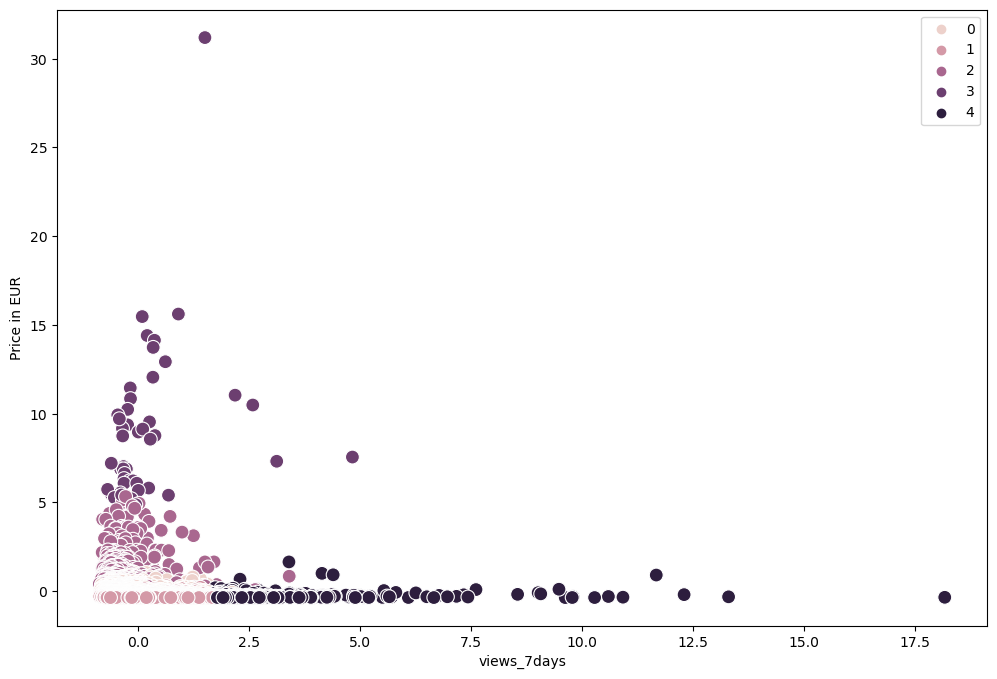

In [35]:
# Plot the clusters for the "7days_views" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['views_7days'], y=df['Price in EUR'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('views_7days') 
plt.ylabel('Price in EUR') 
plt.show()

Explaining the graph
The two graphs does not entirely makes sense or give a great insight to the relationship between the cost of the boat and either of the Length or Views of each boat. This gives a suggestion that there are other important factors that are inclusively and would all together be determinant of the boat price

In [41]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'semi-dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'light purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [42]:
df.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         'views_7days':['mean', 'median'],
                          'Price in EUR':['mean', 'median']})

Length               Width           views_7days  \
                      mean    median      mean    median        mean   
cluster                                                                
dark purple      -0.575036 -0.708652 -0.602261 -0.808388    3.334415   
light pink        0.394920  0.363442  0.533683  0.520987   -0.301275   
light purple     -0.689750 -0.710584 -0.750076 -0.826232   -0.017892   
purple            2.007932  1.900111  1.845493  1.698690   -0.357680   
semi-dark purple  4.216284  3.834711  3.414558  3.233271    0.221350   

                           Price in EUR            
                    median         mean    median  
cluster                                            
dark purple       2.620598    -0.263829 -0.323567  
light pink       -0.398289    -0.049744 -0.110483  
light purple     -0.152328    -0.283706 -0.305931  
purple           -0.462708     1.129238  0.823037  
semi-dark purple -0.152328     8.986913  7.552443

Explanations
The data does not "help" to describe or understand the relationship between the columns.
The semi-dark purple cluster shows by far the best statistics. 
After the analysis it looks like there is a need to check other variables as well: Length and Width  as well as price are higher in the semi-dark purple cluster but in the dark purple cluster much lower.

In [44]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_clusters.csv'))